In [1]:
# The usual preamble
%matplotlib inline
import polars as pl
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('ggplot')

pl.Config.set_tbl_cols(60)
pl.Config.set_fmt_str_lengths(5000)

plt.rcParams['figure.figsize'] = (15, 5)

Let's continue with our NYC 311 service requests example.

In [2]:
# because of mixed types we specify dtype to prevent any errors
complaints = pl.read_csv('./data/311-service-requests.csv', infer_schema_length=0, schema_overrides=[pl.Utf8])

# 3.1 Selecting only noise complaints

I'd like to know which borough has the most noise complaints. First, we'll take a look at the data to see what it looks like:

In [3]:
complaints[:5]

Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Cross Street 1,Cross Street 2,Intersection Street 1,Intersection Street 2,Address Type,City,Landmark,Facility Type,Status,Due Date,Resolution Action Updated Date,Community Board,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Park Facility Name,Park Borough,School Name,School Number,School Region,School Code,School Phone Number,School Address,School City,School State,School Zip,School Not Found,School or Citywide Complaint,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str
"""26589651""","""10/31/2013 02:08:41 AM""",null,"""NYPD""","""New York City Police Department""","""Noise - Street/Sidewalk""","""Loud Talking""","""Street/Sidewalk""","""11432""","""90-03 169 STREET""","""169 STREET""","""90 AVENUE""","""91 AVENUE""",null,null,"""ADDRESS""","""JAMAICA""",null,"""Precinct""","""Assigned""","""10/31/2013 10:08:41 AM""","""10/31/2013 02:35:17 AM""","""12 QUEENS""","""QUEENS""","""1042027""","""197389""","""Unspecified""","""QUEENS""","""Unspecified""","""Unspecified""","""Unspecified""","""Unspecified""","""Unspecified""","""Unspecified""","""Unspecified""","""Unspecified""","""Unspecified""","""N""",null,null,null,null,null,null,null,null,null,null,null,"""40.70827532593202""","""-73.79160395779721""","""(40.70827532593202, -73.79160395779721)"""
"""26593698""","""10/31/2013 02:01:04 AM""",null,"""NYPD""","""New York City Police Department""","""Illegal Parking""","""Commercial Overnight Parking""","""Street/Sidewalk""","""11378""","""58 AVENUE""","""58 AVENUE""","""58 PLACE""","""59 STREET""",null,null,"""BLOCKFACE""","""MASPETH""",null,"""Precinct""","""Open""","""10/31/2013 10:01:04 AM""",null,"""05 QUEENS""","""QUEENS""","""1009349""","""201984""","""Unspecified""","""QUEENS""","""Unspecified""","""Unspecified""","""Unspecified""","""Unspecified""","""Unspecified""","""Unspecified""","""Unspecified""","""Unspecified""","""Unspecified""","""N""",null,null,null,null,null,null,null,null,null,null,null,"""40.721040535628305""","""-73.90945306791765""","""(40.721040535628305, -73.90945306791765)"""
"""26594139""","""10/31/2013 02:00:24 AM""","""10/31/2013 02:40:32 AM""","""NYPD""","""New York City Police Department""","""Noise - Commercial""","""Loud Music/Party""","""Club/Bar/Restaurant""","""10032""","""4060 BROADWAY""","""BROADWAY""","""WEST 171 STREET""","""WEST 172 STREET""",null,null,"""ADDRESS""","""NEW YORK""",null,"""Precinct""","""Closed""","""10/31/2013 10:00:24 AM""","""10/31/2013 02:39:42 AM""","""12 MANHATTAN""","""MANHATTAN""","""1001088""","""246531""","""Unspecified""","""MANHATTAN""","""Unspecified""","""Unspecified""","""Unspecified""","""Unspecified""","""Unspecified""","""Unspecified""","""Unspecified""","""Unspecified""","""Unspecified""","""N""",null,null,null,null,null,null,null,null,null,null,null,"""40.84332975466513""","""-73.93914371913482""","""(40.84332975466513, -73.93914371913482)"""
"""26595721""","""10/31/2013 01:56:23 AM""","""10/31/2013 02:21:48 AM""","""NYPD""","""New York City Police Department""","""Noise - Vehicle""","""Car/Truck Horn""","""Street/Sidewalk""","""10023""","""WEST 72 STREET""","""WEST 72 STREET""","""COLUMBUS AVENUE""","""AMSTERDAM AVENUE""",null,null,"""BLOCKFACE""","""NEW YORK""",null,"""Precinct""","""Closed""","""10/31/2013 09:56:23 AM""","""10/31/2013 02:21:10 AM""","""07 MANHATTAN""","""MANHATTAN""","""989730""","""222727""","""Unspecified""","""MANHATTAN""","""Unspecified""","""Unspecified""","""Unspecified""","""Unspecified""","""Unspecified""","""Unsp

To get the noise complaints, we need to find the rows where the "Complaint Type" column is "Noise - Street/Sidewalk". I'll show you how to do that, and then explain what's going on.

In [5]:
noise_complaints = complaints.filter(pl.col('Complaint Type') == "Noise - Street/Sidewalk")
noise_complaints[:3]

Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Cross Street 1,Cross Street 2,Intersection Street 1,Intersection Street 2,Address Type,City,Landmark,Facility Type,Status,Due Date,Resolution Action Updated Date,Community Board,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Park Facility Name,Park Borough,School Name,School Number,School Region,School Code,School Phone Number,School Address,School City,School State,School Zip,School Not Found,School or Citywide Complaint,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str
"""26589651""","""10/31/2013 02:08:41 AM""",null,"""NYPD""","""New York City Police Department""","""Noise - Street/Sidewalk""","""Loud Talking""","""Street/Sidewalk""","""11432""","""90-03 169 STREET""","""169 STREET""","""90 AVENUE""","""91 AVENUE""",null,null,"""ADDRESS""","""JAMAICA""",null,"""Precinct""","""Assigned""","""10/31/2013 10:08:41 AM""","""10/31/2013 02:35:17 AM""","""12 QUEENS""","""QUEENS""","""1042027""","""197389""","""Unspecified""","""QUEENS""","""Unspecified""","""Unspecified""","""Unspecified""","""Unspecified""","""Unspecified""","""Unspecified""","""Unspecified""","""Unspecified""","""Unspecified""","""N""",null,null,null,null,null,null,null,null,null,null,null,"""40.70827532593202""","""-73.79160395779721""","""(40.70827532593202, -73.79160395779721)"""
"""26594086""","""10/31/2013 12:54:03 AM""","""10/31/2013 02:16:39 AM""","""NYPD""","""New York City Police Department""","""Noise - Street/Sidewalk""","""Loud Music/Party""","""Street/Sidewalk""","""10310""","""173 CAMPBELL AVENUE""","""CAMPBELL AVENUE""","""HENDERSON AVENUE""","""WINEGAR LANE""",null,null,"""ADDRESS""","""STATEN ISLAND""",null,"""Precinct""","""Closed""","""10/31/2013 08:54:03 AM""","""10/31/2013 02:07:14 AM""","""01 STATEN ISLAND""","""STATEN ISLAND""","""952013""","""171076""","""Unspecified""","""STATEN ISLAND""","""Unspecified""","""Unspecified""","""Unspecified""","""Unspecified""","""Unspecified""","""Unspecified""","""Unspecified""","""Unspecified""","""Unspecified""","""N""",null,null,null,null,null,null,null,null,null,null,null,"""40.63618202176914""","""-74.1161500428337""","""(40.63618202176914, -74.1161500428337)"""
"""26591573""","""10/31/2013 12:35:18 AM""","""10/31/2013 02:41:35 AM""","""NYPD""","""New York City Police Department""","""Noise - Street/Sidewalk""","""Loud Talking""","""Street/Sidewalk""","""10312""","""24 PRINCETON LANE""","""PRINCETON LANE""","""HAMPTON GREEN""","""DEAD END""",null,null,"""ADDRESS""","""STATEN ISLAND""",null,"""Precinct""","""Closed""","""10/31/2013 08:35:18 AM""","""10/31/2013 01:45:17 AM""","""03 STATEN ISLAND""","""STATEN ISLAND""","""929577""","""140964""","""Unspecified""","""STATEN ISLAND""","""Unspecified""","""Unspecified""","""Unspecified""","""Unspecified""","""Unspecified""","""Unspecified""","""Unspecified""","""Unspecified""","""Unspecified""","""N""",null,null,null,null,null,null,null,null,null,null,null,"""40.55342078716953""","""-74.19674315017886""","""(40.55342078716953, -74.19674315017886)"""


You can also combine more than one condition with the `&` operator like this:

In [8]:
is_noise = complaints['Complaint Type'] == "Noise - Street/Sidewalk"
in_brooklyn = complaints['Borough'] == "BROOKLYN"
filtered_complaints = complaints.filter(is_noise & in_brooklyn)
filtered_complaints[:5]

Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Cross Street 1,Cross Street 2,Intersection Street 1,Intersection Street 2,Address Type,City,Landmark,Facility Type,Status,Due Date,Resolution Action Updated Date,Community Board,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Park Facility Name,Park Borough,School Name,School Number,School Region,School Code,School Phone Number,School Address,School City,School State,School Zip,School Not Found,School or Citywide Complaint,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str
"""26595564""","""10/31/2013 12:30:36 AM""",null,"""NYPD""","""New York City Police Department""","""Noise - Street/Sidewalk""","""Loud Music/Party""","""Street/Sidewalk""","""11236""","""AVENUE J""","""AVENUE J""","""EAST 80 STREET""","""EAST 81 STREET""",null,null,"""BLOCKFACE""","""BROOKLYN""",null,"""Precinct""","""Open""","""10/31/2013 08:30:36 AM""",null,"""18 BROOKLYN""","""BROOKLYN""","""1008937""","""170310""","""Unspecified""","""BROOKLYN""","""Unspecified""","""Unspecified""","""Unspecified""","""Unspecified""","""Unspecified""","""Unspecified""","""Unspecified""","""Unspecified""","""Unspecified""","""N""",null,null,null,null,null,null,null,null,null,null,null,"""40.634103775951736""","""-73.91105541883589""","""(40.634103775951736, -73.91105541883589)"""
"""26595553""","""10/31/2013 12:05:10 AM""","""10/31/2013 02:43:43 AM""","""NYPD""","""New York City Police Department""","""Noise - Street/Sidewalk""","""Loud Talking""","""Street/Sidewalk""","""11225""","""25 LEFFERTS AVENUE""","""LEFFERTS AVENUE""","""WASHINGTON AVENUE""","""BEDFORD AVENUE""",null,null,"""ADDRESS""","""BROOKLYN""",null,"""Precinct""","""Closed""","""10/31/2013 08:05:10 AM""","""10/31/2013 01:29:29 AM""","""09 BROOKLYN""","""BROOKLYN""","""995366""","""180388""","""Unspecified""","""BROOKLYN""","""Unspecified""","""Unspecified""","""Unspecified""","""Unspecified""","""Unspecified""","""Unspecified""","""Unspecified""","""Unspecified""","""Unspecified""","""N""",null,null,null,null,null,null,null,null,null,null,null,"""40.6617931276793""","""-73.95993363978067""","""(40.6617931276793, -73.95993363978067)"""
"""26594653""","""10/30/2013 11:26:32 PM""","""10/31/2013 12:18:54 AM""","""NYPD""","""New York City Police Department""","""Noise - Street/Sidewalk""","""Loud Music/Party""","""Street/Sidewalk""","""11222""",null,null,null,null,"""DOBBIN STREET""","""NORMAN STREET""","""INTERSECTION""","""BROOKLYN""",null,"""Precinct""","""Closed""","""10/31/2013 07:26:32 AM""","""10/31/2013 12:18:54 AM""","""01 BROOKLYN""","""BROOKLYN""","""996925""","""203271""","""Unspecified""","""BROOKLYN""","""Unspecified""","""Unspecified""","""Unspecified""","""Unspecified""","""Unspecified""","""Unspecified""","""Unspecified""","""Unspecified""","""Unspecified""","""N""",null,null,null,null,null,null,null,null,null,null,null,"""40.724599563793525""","""-73.95427134534344""","""(40.724599563793525, -73.95427134534344)"""
"""26591992""","""10/30/2013 10:02:58 PM""","""10/30/2013 10:23:20 PM""","""NYPD""","""New York City Police Department""","""Noise - Street/Sidewalk""","""Loud Talking""","""Street/Sidewalk""","""11218""","""DITMAS AVENUE""","""DITMAS AVENUE""",null,null,null,null,"""LATLONG""","""BROOKLYN""",null,"""Precinct""","""Closed""","""10/31/2013 06:02:58 AM""","""10/30/2013 10:23:20 PM""","""01 BROOKLYN""","""BROOKLYN""","""991895""","""171051""","""Unspecified""","""BROOKLYN""","""Unspecified""","""Unspecified""","""Unspecified""","""Unspecified""","""Unspecified""","""Unspeci

Or if we just wanted a few columns:

In [9]:
filtered_complaints[['Complaint Type', 'Borough', 'Created Date', 'Descriptor']][:10]

Complaint Type,Borough,Created Date,Descriptor
str,str,str,str
"""Noise - Street/Sidewalk""","""BROOKLYN""","""10/31/2013 12:30:36 AM""","""Loud Music/Party"""
"""Noise - Street/Sidewalk""","""BROOKLYN""","""10/31/2013 12:05:10 AM""","""Loud Talking"""
"""Noise - Street/Sidewalk""","""BROOKLYN""","""10/30/2013 11:26:32 PM""","""Loud Music/Party"""
"""Noise - Street/Sidewalk""","""BROOKLYN""","""10/30/2013 10:02:58 PM""","""Loud Talking"""
"""Noise - Street/Sidewalk""","""BROOKLYN""","""10/30/2013 08:38:25 PM""","""Loud Music/Party"""
"""Noise - Street/Sidewalk""","""BROOKLYN""","""10/30/2013 08:32:13 PM""","""Loud Talking"""
"""Noise - Street/Sidewalk""","""BROOKLYN""","""10/30/2013 06:07:39 PM""","""Loud Music/Party"""
"""Noise - Street/Sidewalk""","""BROOKLYN""","""10/30/2013 03:04:51 PM""","""Loud Talking"""
"""Noise - Street/Sidewalk""","""BROOKLYN""","""10/29/2013 10:07:02 PM""","""Loud Talking"""


# 3.2 A digression about numpy arrays

On the inside, the type of a column is `pl.Series`

In [10]:
pl.Series([1,2,3])

""
i64
1
2
3


unlike Pandas, they are not numpy arrays, yuou have to convert if you want np

In [11]:
np.array([1,2,3])

array([1, 2, 3])

In [14]:
pl.Series([1,2,3]).to_numpy()

array([1, 2, 3])

So this binary-array-selection business is actually something that works with any numpy array:

In [15]:
arr = np.array([1,2,3])

In [16]:
arr != 2

array([ True, False,  True])

In [17]:
arr[arr != 2]

array([1, 3])

# 3.3 So, which borough has the most noise complaints?

In [20]:
is_noise = complaints['Complaint Type'] == "Noise - Street/Sidewalk"
noise_complaints = complaints.filter(is_noise)
noise_complaints['Borough'].value_counts(sort=True)

Borough,count
str,u32
"""MANHATTAN""",917
"""BROOKLYN""",456
"""BRONX""",292
"""QUEENS""",226
"""STATEN ISLAND""",36
"""Unspecified""",1


It's Manhattan! But what if we wanted to divide by the total number of complaints, to make it make a bit more sense? That would be easy too:

In [28]:
noise_complaint_counts = noise_complaints['Borough'].value_counts()
complaint_counts = complaints['Borough'].value_counts()

In [ ]:
df1 = pl.DataFrame(noise_complaint_counts)
df2 = pl.DataFrame(complaint_counts)
df1 = df1.rename({"count": "counts1"})
df2 = df2.rename({"count": "counts2"})
merged_df = df1.join(df2, on="Borough")
merged_df = merged_df.with_columns((pl.col("counts1") / pl.col("counts2")).alias("ratio"))
merged_df["Borough", "ratio"]


Borough,ratio
str,f64
"""MANHATTAN""",0.037755
"""BROOKLYN""",0.013864
"""Unspecified""",0.000141
"""QUEENS""",0.010143
"""STATEN ISLAND""",0.007474
"""BRONX""",0.014833


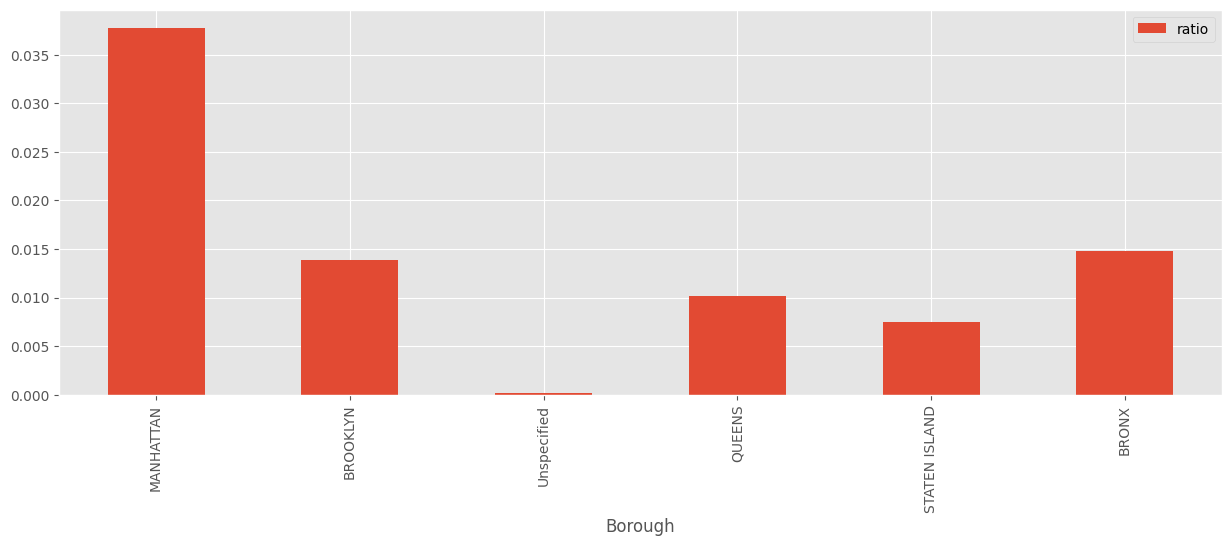

In [37]:
borough_ratio=merged_df["Borough", "ratio"].to_pandas()
borough_ratio.plot(kind='bar', x='Borough')
plt.show()


So Manhattan really does complain more about noise than the other boroughs! Neat.

<style>
    @font-face {
        font-family: "Computer Modern";
        src: url('http://mirrors.ctan.org/fonts/cm-unicode/fonts/otf/cmunss.otf');
    }
    div.cell{
        width:800px;
        margin-left:16% !important;
        margin-right:auto;
    }
    h1 {
        font-family: Helvetica, serif;
    }
    h4{
        margin-top:12px;
        margin-bottom: 3px;
       }
    div.text_cell_render{
        font-family: Computer Modern, "Helvetica Neue", Arial, Helvetica, Geneva, sans-serif;
        line-height: 145%;
        font-size: 130%;
        width:800px;
        margin-left:auto;
        margin-right:auto;
    }
    .CodeMirror{
            font-family: "Source Code Pro", source-code-pro,Consolas, monospace;
    }
    .text_cell_render h5 {
        font-weight: 300;
        font-size: 22pt;
        color: #4057A1;
        font-style: italic;
        margin-bottom: .5em;
        margin-top: 0.5em;
        display: block;
    }
    
    .warning{
        color: rgb( 240, 20, 20 )
        }  